In [1]:
!pip install tensorflow

     ---------------------------------------- 0.0/376.9 MB ? eta -:--:--
     -------------------------------------- 0.0/376.9 MB 653.6 kB/s eta 0:09:37
     ---------------------------------------- 0.2/376.9 MB 1.6 MB/s eta 0:03:51
     ---------------------------------------- 0.4/376.9 MB 2.8 MB/s eta 0:02:13
     ---------------------------------------- 0.9/376.9 MB 4.7 MB/s eta 0:01:21
     ---------------------------------------- 1.4/376.9 MB 6.4 MB/s eta 0:01:00
     ---------------------------------------- 1.4/376.9 MB 6.4 MB/s eta 0:01:00
     ---------------------------------------- 1.6/376.9 MB 5.8 MB/s eta 0:01:05
     ---------------------------------------- 2.0/376.9 MB 5.9 MB/s eta 0:01:04
     ---------------------------------------- 2.5/376.9 MB 6.0 MB/s eta 0:01:03
     ---------------------------------------- 2.9/376.9 MB 6.3 MB/s eta 0:01:00
     ---------------------------------------- 3.0/376.9 MB 6.5 MB/s eta 0:00:58
     ---------------------------------------- 3

In [125]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [126]:
df = pd.read_csv('C:\\Users\\DHAN RAJ\\Downloads\\btp_forecast_preprocessed_data\\kolkata\\hourly\\imputed_hourly_kolkata_data.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
data = df.drop(columns=['Timestamp'])
# Assuming df is your DataFrame
correlation_matrix = data.corr()
print(correlation_matrix)

                     PM2.5 (µg/m³)  PM10 (µg/m³)  NO (µg/m³)  NO2 (µg/m³)  \
PM2.5 (µg/m³)             1.000000      0.945895    0.402924     0.578399   
PM10 (µg/m³)              0.945895      1.000000    0.415400     0.602774   
NO (µg/m³)                0.402924      0.415400    1.000000     0.589346   
NO2 (µg/m³)               0.578399      0.602774    0.589346     1.000000   
NOx (ppb)                 0.541315      0.563648    0.860616     0.870930   
NH3 (µg/m³)               0.305191      0.315169    0.196940     0.259006   
SO2 (µg/m³)               0.329998      0.354382    0.084223     0.332977   
CO (mg/m³)                0.642284      0.649653    0.636311     0.634489   
Ozone (µg/m³)             0.030328      0.073840   -0.195621    -0.138651   
Benzene (µg/m³)           0.502288      0.513828    0.430681     0.512070   
Toluene (µg/m³)           0.496355      0.500900    0.439660     0.545152   
Eth-Benzene (µg/m³)       0.415017      0.429584    0.301482     0.351807   

In [127]:
# Set correlation threshold
threshold = 0.5

# Find pairs with correlation above threshold
highly_correlated_pairs = [(column1, 'PM2.5 (µg/m³)') for column1 in correlation_matrix.columns if abs(correlation_matrix[column1]['PM2.5 (µg/m³)']) > threshold and column1 != 'PM2.5 (µg/m³)']

In [128]:
from statsmodels.tsa.stattools import grangercausalitytests

# Apply Granger's Causality Test
for pair in highly_correlated_pairs:
    print()
    print(f"Granger Causality Test for pair {pair}:")
    granger_test_result = grangercausalitytests(df[list(pair)], maxlag=12)


Granger Causality Test for pair ('PM10 (µg/m³)', 'PM2.5 (µg/m³)'):

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=667.3604, p=0.0000  , df_denom=26276, df_num=1
ssr based chi2 test:   chi2=667.4366, p=0.0000  , df=1
likelihood ratio test: chi2=659.1016, p=0.0000  , df=1
parameter F test:         F=667.3604, p=0.0000  , df_denom=26276, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=455.4433, p=0.0000  , df_denom=26273, df_num=2
ssr based chi2 test:   chi2=911.0600, p=0.0000  , df=2
likelihood ratio test: chi2=895.6225, p=0.0000  , df=2
parameter F test:         F=455.4433, p=0.0000  , df_denom=26273, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=326.6176, p=0.0000  , df_denom=26270, df_num=3
ssr based chi2 test:   chi2=980.1140, p=0.0000  , df=3
likelihood ratio test: chi2=962.2774, p=0.0000  , df=3
parameter F test:         F=326.6176, p=0.0000  , df_denom=26270, df_num=3

Granger Causa

In [129]:
cols = [i[0] for i in highly_correlated_pairs]
cols.append('PM2.5 (µg/m³)')
cols

['PM10 (µg/m³)',
 'NO2 (µg/m³)',
 'NOx (ppb)',
 'CO (mg/m³)',
 'Benzene (µg/m³)',
 'AT (°C)',
 'PM2.5 (µg/m³)']

In [130]:
df_corr = df[cols]
df_corr.index = df['Timestamp']
from statsmodels.tsa.vector_ar.vecm import coint_johansen
johan_test_temp = df_corr
coint_johansen(johan_test_temp,-1,1).eig

array([0.14738047, 0.11309898, 0.09637358, 0.08263464, 0.04044546,
       0.01954419, 0.00074192])

In [131]:
colums = [i.split()[0] for i in cols]
val = pd.read_excel("C:/Users/DHAN RAJ/Downloads/kolkata_hourly_Jan_1.xlsx")
val['Timestamp'] = pd.to_datetime(val['Timestamp'])
val.set_index('Timestamp', inplace=True)
val = val[colums]
val.columns = cols
val

,PM10 (µg/m³),NO2 (µg/m³),NOx (ppb),CO (mg/m³),Benzene (µg/m³),AT (°C),PM2.5 (µg/m³)
Timestamp,,,,,,,
2024-01-01 00:00:00,202.85,54.55,35.75,0.86,12.17,19.02,114.00
2024-01-01 01:00:00,198.10,45.83,30.40,0.65,10.97,18.63,120.10
2024-01-01 02:00:00,189.50,36.27,24.95,0.56,10.38,18.00,114.50
2024-01-01 03:00:00,180.95,33.02,23.17,0.51,9.52,17.24,106.20
2024-01-01 04:00:00,176.30,24.43,18.10,0.42,8.50,16.79,102.60
2024-01-01 05:00:00,NaN,25.27,18.45,0.41,8.32,16.62,95.75
2024-01-01 06:00:00,NaN,31.78,23.00,0.47,8.29,16.35,88.00
2024-01-01 07:00:00,NaN,45.30,34.95,0.68,10.01,17.27,86.70
2024-01-01 08:00:00,NaN,45.40,35.48,0.66,9.45,18.66,94.80


In [132]:
val['PM2.5 (µg/m³)'].iloc[14] = sum(val['PM2.5 (µg/m³)'].iloc[9:14])/5

C:\Users\DHAN RAJ\AppData\Local\Temp\ipykernel_5944\3879252357.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  val['PM2.5 (µg/m³)'].iloc[14] = sum(val['PM2.5 (µg/m³)'].iloc[9:14])/5


In [151]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=1):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [152]:
WINDOW_SIZE = 1
X1, y1 = df_to_X_y(df_corr, WINDOW_SIZE)
X1.shape, y1.shape

((26279, 1, 1, 7), (26279, 7))

In [153]:
val[cols]= val[cols].fillna(val[cols].rolling(8,min_periods=1).mean())
print(val)
X_test1, y_test1 = df_to_X_y(val, WINDOW_SIZE)

                     PM10 (µg/m³)  NO2 (µg/m³)  NOx (ppb)  CO (mg/m³)  \
Timestamp                                                               
2024-01-01 00:00:00      202.8500        54.55      35.75        0.86   
2024-01-01 01:00:00      198.1000        45.83      30.40        0.65   
2024-01-01 02:00:00      189.5000        36.27      24.95        0.56   
2024-01-01 03:00:00      180.9500        33.02      23.17        0.51   
2024-01-01 04:00:00      176.3000        24.43      18.10        0.42   
2024-01-01 05:00:00      189.5400        25.27      18.45        0.41   
2024-01-01 06:00:00      189.5400        31.78      23.00        0.47   
2024-01-01 07:00:00      189.5400        45.30      34.95        0.68   
2024-01-01 08:00:00      186.2125        45.40      35.48        0.66   
2024-01-01 09:00:00      182.2500        39.70      30.05        0.53   
2024-01-01 10:00:00      178.6250        40.00      27.55        0.51   
2024-01-01 11:00:00      176.3000        45.00     

In [154]:
X_train1, y_train1 = X1[:22335], y1[:22335]
X_val1, y_val1 = X1[22335:], y1[22335:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((22335, 1, 1, 7),
 (22335, 7),
 (3944, 1, 1, 7),
 (3944, 7),
 (23, 1, 1, 7),
 (23, 7))

In [155]:
def df_to_X_y2(df, window_size=1):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][6]
    y.append(label)
  return np.array(X), np.array(y)

In [156]:
X2, y2 = df_to_X_y2(df_corr)
X2.shape, y2.shape

((26279, 1, 7), (26279,))

In [157]:
X2_train, y2_train = X2[:22335], y2[:22335]
X2_val, y2_val = X2[22335:], y2[22335:]
X2_test, y2_test = df_to_X_y2(val)
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((22335, 1, 7), (22335,), (3944, 1, 7), (3944,), (23, 1, 7), (23,))

In [158]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
model4 = Sequential()
model4.add(InputLayer((1, 7)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 64)                  │          18,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,961 (74.07 KB)

 Trainable params: 18,961 (74.07 KB)

 Non-trainable params: 0 (0.00 B)

In [159]:
cp4 = ModelCheckpoint('checkpoint.model4.keras', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [160]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=100, callbacks=[cp4])

Epoch 1/100
698/698 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4803.6465 - mean_absolute_error: 53.2221 - val_loss: 4470.6479 - val_mean_absolute_error: 51.6593
Epoch 2/100
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4425.0205 - mean_absolute_error: 49.3393 - val_loss: 4056.3516 - val_mean_absolute_error: 47.4692
Epoch 3/100
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4060.4436 - mean_absolute_error: 45.5483 - val_loss: 3688.6047 - val_mean_absolute_error: 43.5641
Epoch 4/100
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3604.3621 - mean_absolute_error: 41.0333 - val_loss: 3354.5518 - val_mean_absolute_error: 40.3834
Epoch 5/100
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3268.5720 - mean_absolute_error: 38.1172 - val_loss: 3031.7812 - val_mean_absolute_error: 37.3477
Epoch 6/100
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2978.2942 - mean_absolute_error: 35.2453 - val_loss: 2705.3062 - val_mean_absolute_error: 34.1861
Epoch 7/100
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1m

In [161]:
val

,PM10 (µg/m³),NO2 (µg/m³),NOx (ppb),CO (mg/m³),Benzene (µg/m³),AT (°C),PM2.5 (µg/m³)
Timestamp,,,,,,,
2024-01-01 00:00:00,202.8500,54.55,35.75,0.86,12.17,19.02,114.00
2024-01-01 01:00:00,198.1000,45.83,30.40,0.65,10.97,18.63,120.10
2024-01-01 02:00:00,189.5000,36.27,24.95,0.56,10.38,18.00,114.50
2024-01-01 03:00:00,180.9500,33.02,23.17,0.51,9.52,17.24,106.20
2024-01-01 04:00:00,176.3000,24.43,18.10,0.42,8.50,16.79,102.60
2024-01-01 05:00:00,189.5400,25.27,18.45,0.41,8.32,16.62,95.75
2024-01-01 06:00:00,189.5400,31.78,23.00,0.47,8.29,16.35,88.00
2024-01-01 07:00:00,189.5400,45.30,34.95,0.68,10.01,17.27,86.70
2024-01-01 08:00:00,186.2125,45.40,35.48,0.66,9.45,18.66,94.80


In [163]:
df_corr.tail()

,PM10 (µg/m³),NO2 (µg/m³),NOx (ppb),CO (mg/m³),Benzene (µg/m³),AT (°C),PM2.5 (µg/m³)
Timestamp,,,,,,,
2023-12-31 19:00:00,156.050000,81.275000,49.200000,0.942500,18.437500,20.940000,84.700000
2023-12-31 20:00:00,182.900000,93.675000,61.200000,1.150000,15.112500,19.400000,98.100000
2023-12-31 21:00:00,204.950000,91.325000,66.175000,1.582500,13.862500,19.097500,107.000000
2023-12-31 22:00:00,208.800000,84.275000,60.350000,1.217500,15.100000,19.427500,110.300000
2023-12-31 23:00:00,205.166667,76.133333,52.533333,1.093333,13.943333,19.126667,110.833333


In [171]:
x_test_start = df_corr.values[-1]
x_test_start = np.reshape(x_test_start,(1,1,7))
x_test_start

array([[[205.1666667 ,  76.13333333,  52.53333333,   1.09333333,
          13.94333333,  19.12666667, 110.8333333 ]]])

In [193]:
y_test_start = val.values[0,-1]
y_test = []
y_test.append(y_test_start)
for i in list(y2_test):
    y_test.append(i)
y_test = np.array(y_test)
y_test

array([114.  , 120.1 , 114.5 , 106.2 , 102.6 ,  95.75,  88.  ,  86.7 ,
        94.8 , 103.7 , 101.6 ,  98.4 , 108.25, 119.1 , 106.21, 101.38,
        94.5 ,  90.35,  90.78, 100.23, 105.48, 106.12, 108.15, 127.1 ])

[[[205.1666667   76.13333333  52.53333333   1.09333333  13.94333333
    19.12666667 110.8333333 ]]

 [[202.85        54.55        35.75         0.86        12.17
    19.02       114.        ]]

 [[198.1         45.83        30.4          0.65        10.97
    18.63       120.1       ]]

 [[189.5         36.27        24.95         0.56        10.38
    18.         114.5       ]]

 [[180.95        33.02        23.17         0.51         9.52
    17.24       106.2       ]]

 [[176.3         24.43        18.1          0.42         8.5
    16.79       102.6       ]]

 [[189.54        25.27        18.45         0.41         8.32
    16.62        95.75      ]]

 [[189.54        31.78        23.           0.47         8.29
    16.35        88.        ]]

 [[189.54        45.3         34.95         0.68        10.01
    17.27        86.7       ]]

 [[186.2125      45.4         35.48         0.66         9.45
    18.66        94.8       ]]

 [[182.25        39.7         30.05         0.53       

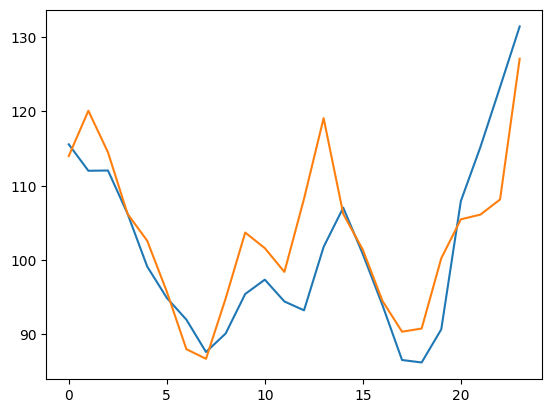

In [278]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt
def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mae(y, predictions)
X_test = np.vstack((x_test_start, X2_test))
print(X_test)
df_4, mae_4 = plot_predictions1(model4, X_test, y_test)

In [279]:
df_4

,Predictions,Actuals
0,115.574577,114.00
1,112.016296,120.10
2,112.051361,114.50
3,106.227646,106.20
4,99.132889,102.60
5,94.906441,95.75
6,91.971367,88.00
7,87.619438,86.70
8,90.100189,94.80
9,95.428978,103.70


In [280]:
mae_4

5.244760437011717

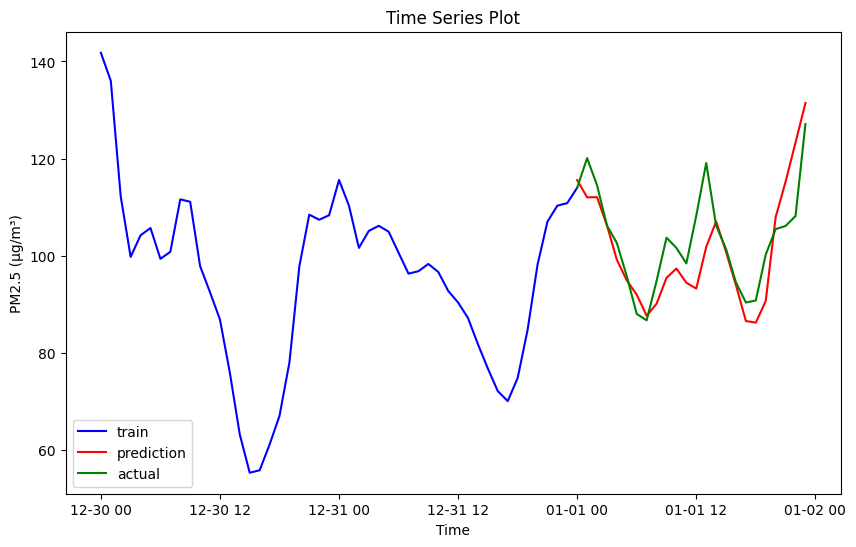

In [323]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 and df2 are your dataframes and 'time' is the time column
# Also assuming that 'value' is the column you want to plot

# Join the dataframes
df_4.index = val.index
df = pd.concat([df_corr['PM2.5 (µg/m³)'], df_4['Predictions']])
df_org = pd.concat([df_corr['PM2.5 (µg/m³)'], val['PM2.5 (µg/m³)']])

df.columns = 'PM2.5 (µg/m³)'
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_org.index[-72:len(df_corr['PM2.5 (µg/m³)'])+1], df_org[-72:len(df_corr['PM2.5 (µg/m³)'])+1], color='blue', label='train')
plt.plot(df.index[len(df_corr['PM2.5 (µg/m³)']):], df[len(df_corr['PM2.5 (µg/m³)']):], color='red', label='prediction')
plt.plot(df_org.index[len(df_corr['PM2.5 (µg/m³)']):],df_org[len(df_corr['PM2.5 (µg/m³)']):],color='green',label='actual')
plt.xlabel('Time')
plt.ylabel('PM2.5 (µg/m³)')
plt.title('Time Series Plot')
plt.legend()
plt.show()


In [195]:
def df_to_X_y3(df, window_size=1):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [197]:
X3, y3 = df_to_X_y3(df_corr)
X3.shape, y3.shape

((26279, 1, 7), (26279, 7))

In [199]:
X3_train, y3_train = X3[:22335], y3[:22335]
X3_val, y3_val = X3[22335:], y3[22335:]
X3_test, y3_test = df_to_X_y3(val)
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((22335, 1, 7), (22335, 7), (3944, 1, 7), (3944, 7), (23, 1, 7), (23, 7))

In [219]:
model5 = Sequential()
model5.add(InputLayer((1, 7)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(7, 'linear'))

model5.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 64)                  │          18,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 7)                   │              63 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,015 (74.28 KB)

 Trainable params: 19,015 (74.28 KB)

 Non-trainable params: 0 (0.00 B)

In [220]:
cp5 = ModelCheckpoint('checkpoint.model5.keras', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [221]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=200, callbacks=[cp5])

Epoch 1/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4124.3032 - mean_absolute_error: 38.9362 - val_loss: 3784.2285 - val_mean_absolute_error: 37.3805
Epoch 2/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3925.2693 - mean_absolute_error: 37.1635 - val_loss: 3608.2981 - val_mean_absolute_error: 35.8455
Epoch 3/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3689.8193 - mean_absolute_error: 35.1181 - val_loss: 3373.1736 - val_mean_absolute_error: 33.5548
Epoch 4/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3492.7061 - mean_absolute_error: 32.7279 - val_loss: 3039.2681 - val_mean_absolute_error: 29.9741
Epoch 5/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3145.8655 - mean_absolute_error: 29.1787 - val_loss: 2630.6418 - val_mean_absolute_error: 25.9986
Epoch 6/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2758.0698 - mean_absolute_error: 25.6165 - val_loss: 2251.8855 - val_mean_absolute_error: 23.1266
Epoch 7/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1m

In [281]:
def mae(true, pred):
    return np.mean(np.abs(true - pred))

def plot_predictions2(model, X, y, cols, start=0, end=100):
    predictions = model.predict(X)
    df = pd.DataFrame(data=predictions)
    df.columns=cols
    org = pd.DataFrame(data=y)
    org.columns = cols
    plt.plot(df['PM2.5 (µg/m³)'][start:end])
    plt.plot(org['PM2.5 (µg/m³)'][start:end])
    a = org.astype('float32')
    print(predictions[:,-1].dtype)
    ma = mae(a['PM2.5 (µg/m³)'],df['PM2.5 (µg/m³)'])
    return df[start:end], org, ma
x_test_start = df_corr.values[-1]
x_test_start = np.reshape(x_test_start,(1,1,7))
y_test_start = val.values[0]
X_test_7 = np.vstack((x_test_start, X2_test))
print(X_test_7.shape)
y_test_7 = np.vstack((y_test_start, y3_test))
print(y_test_7.shape)

(24, 1, 7)
(24, 7)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
float32
mean absolute error:  5.2537255


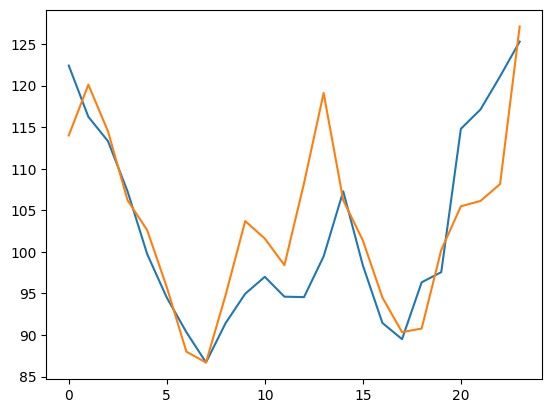

In [282]:
df_5, org_5, mae_5 = plot_predictions2(model5, X_test_7, y_test_7,cols)
print("mean absolute error: ",mae_5)

In [283]:
df_5

,PM10 (µg/m³),NO2 (µg/m³),NOx (ppb),CO (mg/m³),Benzene (µg/m³),AT (°C),PM2.5 (µg/m³)
0,204.427780,63.633617,78.825638,0.743779,10.559079,18.167763,122.397774
1,189.254089,46.654182,47.996250,0.614125,7.283685,17.715012,116.236046
2,177.013489,40.155174,34.515213,0.549861,5.513572,17.511089,113.310768
3,168.669067,33.874752,25.799440,0.519157,4.964633,17.327915,107.270348
4,160.927170,31.356993,23.171373,0.466305,3.448682,17.125706,99.735237
5,156.874313,24.665936,15.817625,0.440898,2.198260,17.010296,94.496254
6,167.464401,20.759712,14.326708,0.385701,-0.294552,17.614815,90.344086
7,168.867249,24.216459,21.152273,0.366578,-0.615811,17.821747,86.707527
8,177.487396,38.078060,44.789135,0.505699,4.325087,18.504929,91.430374
9,171.527466,39.927414,43.235329,0.508454,4.290222,19.036633,94.964516


In [284]:
org_5

,PM10 (µg/m³),NO2 (µg/m³),NOx (ppb),CO (mg/m³),Benzene (µg/m³),AT (°C),PM2.5 (µg/m³)
0,202.8500,54.55,35.75,0.86,12.17,19.02,114.00
1,198.1000,45.83,30.40,0.65,10.97,18.63,120.10
2,189.5000,36.27,24.95,0.56,10.38,18.00,114.50
3,180.9500,33.02,23.17,0.51,9.52,17.24,106.20
4,176.3000,24.43,18.10,0.42,8.50,16.79,102.60
5,189.5400,25.27,18.45,0.41,8.32,16.62,95.75
6,189.5400,31.78,23.00,0.47,8.29,16.35,88.00
7,189.5400,45.30,34.95,0.68,10.01,17.27,86.70
8,186.2125,45.40,35.48,0.66,9.45,18.66,94.80
9,182.2500,39.70,30.05,0.53,9.94,20.54,103.70


In [285]:
mae_5

5.2537255

In [287]:
df_5.index = val.index

In [288]:
df_5

,PM10 (µg/m³),NO2 (µg/m³),NOx (ppb),CO (mg/m³),Benzene (µg/m³),AT (°C),PM2.5 (µg/m³)
Timestamp,,,,,,,
2024-01-01 00:00:00,204.427780,63.633617,78.825638,0.743779,10.559079,18.167763,122.397774
2024-01-01 01:00:00,189.254089,46.654182,47.996250,0.614125,7.283685,17.715012,116.236046
2024-01-01 02:00:00,177.013489,40.155174,34.515213,0.549861,5.513572,17.511089,113.310768
2024-01-01 03:00:00,168.669067,33.874752,25.799440,0.519157,4.964633,17.327915,107.270348
2024-01-01 04:00:00,160.927170,31.356993,23.171373,0.466305,3.448682,17.125706,99.735237
2024-01-01 05:00:00,156.874313,24.665936,15.817625,0.440898,2.198260,17.010296,94.496254
2024-01-01 06:00:00,167.464401,20.759712,14.326708,0.385701,-0.294552,17.614815,90.344086
2024-01-01 07:00:00,168.867249,24.216459,21.152273,0.366578,-0.615811,17.821747,86.707527
2024-01-01 08:00:00,177.487396,38.078060,44.789135,0.505699,4.325087,18.504929,91.430374


In [302]:
df

Timestamp
2021-01-01 00:00:00    152.600000
2021-01-01 01:00:00    151.150000
2021-01-01 02:00:00    140.720000
2021-01-01 03:00:00    124.570000
2021-01-01 04:00:00    104.650000
                          ...    
2024-01-01 19:00:00     97.563210
2024-01-01 20:00:00    114.794327
2024-01-01 21:00:00    117.116264
2024-01-01 22:00:00    121.098541
2024-01-01 23:00:00    125.282570
Name: PM2.5 (µg/m³), Length: 26304, dtype: float64

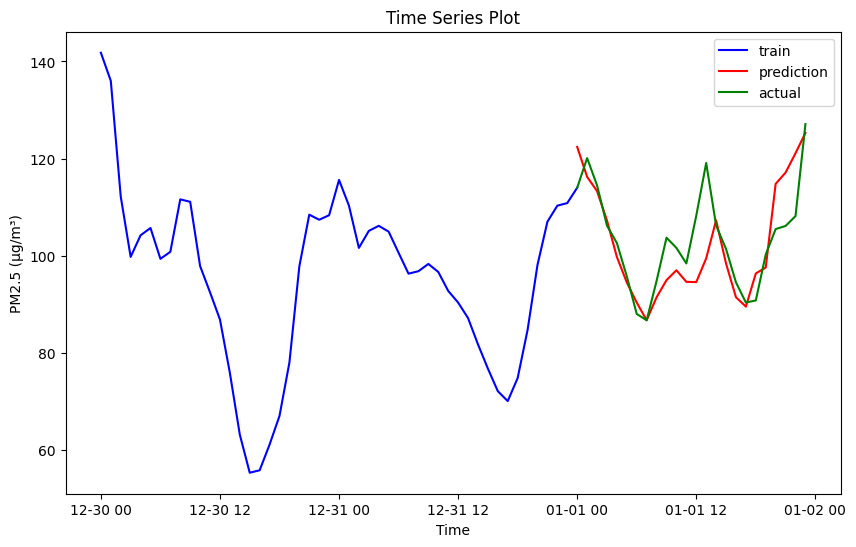

In [322]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 and df2 are your dataframes and 'time' is the time column
# Also assuming that 'value' is the column you want to plot

# Join the dataframes
df = pd.concat([df_corr['PM2.5 (µg/m³)'], df_5['PM2.5 (µg/m³)']])
org_5.index = val.index
df_org = pd.concat([df_corr['PM2.5 (µg/m³)'], org_5['PM2.5 (µg/m³)']])
df.columns = 'PM2.5 (µg/m³)'
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_org.index[-72:len(df_corr['PM2.5 (µg/m³)'])+1], df_org[-72:len(df_corr['PM2.5 (µg/m³)'])+1], color='blue', label='train')
plt.plot(df.index[len(df_corr['PM2.5 (µg/m³)']):], df[len(df_corr['PM2.5 (µg/m³)']):], color='red', label='prediction')
plt.plot(df_org.index[len(df_corr['PM2.5 (µg/m³)']):],df_org[len(df_corr['PM2.5 (µg/m³)']):],color='green',label='actual')
plt.xlabel('Time')
plt.ylabel('PM2.5 (µg/m³)')
plt.title('Time Series Plot')
plt.legend()
plt.show()


In [232]:
model6 = Sequential()
model6.add(InputLayer((1, 7)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(7, 'linear'))

model6.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                       │ (None, 1, 32)               │           5,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_22 (LSTM)                       │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 7)                   │              63 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,535 (119.28 KB)

 Trainable params: 30,535 (119.28 KB)

 Non-trainable params: 0 (0.00 B)

In [233]:
cp6 = ModelCheckpoint('checkpoints.model6.keras', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [235]:
model6.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=150, callbacks=[cp6])

Epoch 1/150
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 607.6210 - mean_absolute_error: 11.9987 - val_loss: 399.6583 - val_mean_absolute_error: 10.7207
Epoch 2/150
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 533.2026 - mean_absolute_error: 11.3320 - val_loss: 364.2550 - val_mean_absolute_error: 10.3911
Epoch 3/150
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 517.9312 - mean_absolute_error: 11.1718 - val_loss: 344.2359 - val_mean_absolute_error: 10.1987
Epoch 4/150
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 481.0594 - mean_absolute_error: 10.9244 - val_loss: 338.2476 - val_mean_absolute_error: 10.1088
Epoch 5/150
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 464.2213 - mean_absolute_error: 10.7810 - val_loss: 333.1816 - val_mean_absolute_error: 9.9905
Epoch 6/150
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 450.9935 - mean_absolute_error: 10.6414 - val_loss: 324.7489 - val_mean_absolute_error: 9.9422
Epoch 7/150
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss:

In [240]:
model7 = Sequential()
model7.add(InputLayer((1, 7)))
model7.add(Conv1D(64, kernel_size=1, activation='relu'))
model7.add(Flatten())
model7.add(Dense(8, 'relu'))
model7.add(Dense(7, 'linear'))
model7.summary()

cp7 = ModelCheckpoint('checkpoints.model7.keras', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[tf.keras.metrics.MeanAbsoluteError()])

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)                    │ (None, 1, 64)               │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 7)                   │              63 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,095 (4.28 KB)

 Trainable params: 1,095 (4.28 KB)

 Non-trainable params: 0 (0.00 B)

In [241]:
model7.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=200, callbacks=[cp7])

Epoch 1/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4177.0908 - mean_absolute_error: 40.4068 - val_loss: 2227.6064 - val_mean_absolute_error: 31.9465
Epoch 2/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1918.1539 - mean_absolute_error: 29.7268 - val_loss: 898.7231 - val_mean_absolute_error: 20.6072
Epoch 3/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 695.3785 - mean_absolute_error: 17.3891 - val_loss: 373.8423 - val_mean_absolute_error: 12.7527
Epoch 4/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 322.4316 - mean_absolute_error: 10.9102 - val_loss: 214.1290 - val_mean_absolute_error: 9.5148
Epoch 5/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 225.2857 - mean_absolute_error: 8.2774 - val_loss: 164.3156 - val_mean_absolute_error: 7.9162
Epoch 6/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 199.7006 - mean_absolute_error: 7.3096 - val_loss: 149.5000 - val_mean_absolute_error: 7.2914
Epoch 7/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
float32


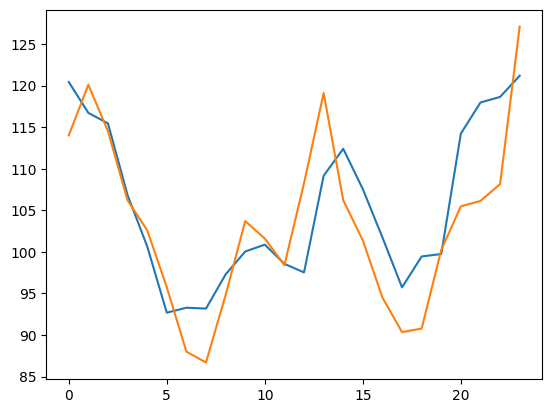

In [324]:
df_7, org_7, mae_7 = plot_predictions2(model7, X_test_7, y_test_7,cols)

In [325]:
mae_7

5.289263

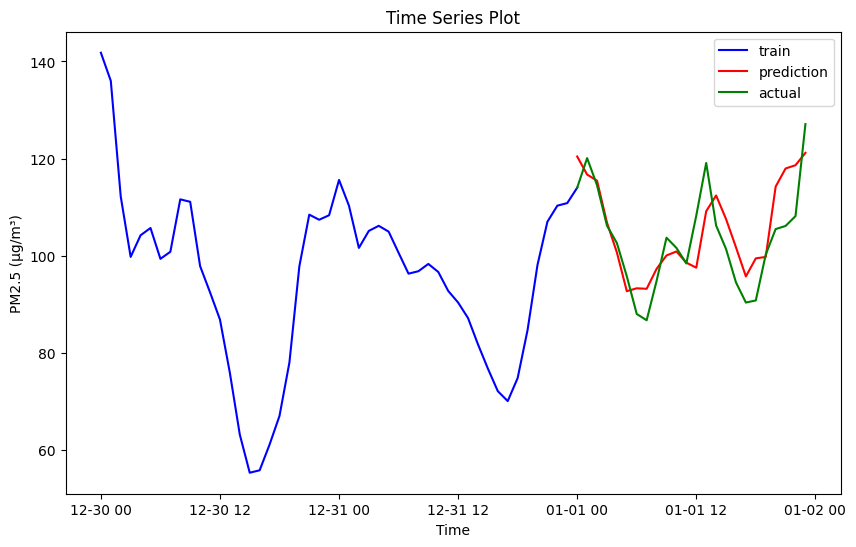

In [327]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 and df2 are your dataframes and 'time' is the time column
# Also assuming that 'value' is the column you want to plot

# Join the dataframes
df_7.index = val.index
df = pd.concat([df_corr['PM2.5 (µg/m³)'], df_7['PM2.5 (µg/m³)']])
org_7.index = val.index
df_org = pd.concat([df_corr['PM2.5 (µg/m³)'], org_7['PM2.5 (µg/m³)']])
df.columns = 'PM2.5 (µg/m³)'
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_org.index[-72:len(df_corr['PM2.5 (µg/m³)'])+1], df_org[-72:len(df_corr['PM2.5 (µg/m³)'])+1], color='blue', label='train')
plt.plot(df.index[len(df_corr['PM2.5 (µg/m³)']):], df[len(df_corr['PM2.5 (µg/m³)']):], color='red', label='prediction')
plt.plot(df_org.index[len(df_corr['PM2.5 (µg/m³)']):],df_org[len(df_corr['PM2.5 (µg/m³)']):],color='green',label='actual')
plt.xlabel('Time')
plt.ylabel('PM2.5 (µg/m³)')
plt.title('Time Series Plot')
plt.legend()
plt.show()